# Aim
- **Objective:**  
  Implement and evaluate a Multi-Layer Perceptron (MLP) classifier for binary classification on both linearly separable and non-linearly separable datasets.
- **Workflow:**  
  - **Data Generation:**  
    Create two synthetic datasets: one that is linearly separable using `make_classification` and another that is non-linearly separable using `make_moons`.
  - **Preprocessing:**  
    Split each dataset into training and testing sets and standardize the features using `StandardScaler`.
  - **Model Training & Hyperparameter Tuning:**  
    Train an MLP classifier using an extensive hyperparameter grid with GridSearchCV to find the best model configuration.
  - **Evaluation & Visualization:**  
    Evaluate model performance using accuracy, classification reports, confusion matrices, ROC curves, and loss curves. Also, visualize decision boundaries to better understand model behavior.

# Algorithm
1. **Data Preparation and Exploration:**
   - Generate a 2D synthetic dataset using `make_classification` for linearly separable data.
   - Generate a non-linearly separable dataset using `make_moons`.
   - Visualize both datasets with scatter plots to inspect the distribution and separability.
2. **Preprocessing:**
   - Split the data into training and testing sets using stratified sampling.
   - Scale the data using `StandardScaler` to normalize features, which is essential for neural network performance.
3. **Model Training and Hyperparameter Tuning:**
   - Define an extensive grid of hyperparameters (including multiple configurations for hidden layer sizes, activation functions, solvers, regularization strength, and learning rates).
   - Use `GridSearchCV` with cross-validation to find the best set of hyperparameters.
4. **Model Evaluation:**
   - Test the best estimator on the hold-out test set.
   - Compute standard classification metrics such as accuracy, precision, recall, and F1-score via the classification report.
   - Visualize the confusion matrix to inspect the distribution of errors.
   - Plot the ROC curve and calculate the AUC to evaluate the performance of the model on binary classification.
   - Visualize the decision boundary to understand how the model separates the classes.
   - Optionally, plot the training loss curve to observe the convergence behavior of the model.
5. **Visualization:**
   - Use matplotlib and seaborn for visualizations of raw data, decision boundaries, ROC curves, loss curves, and confusion matrices, providing both qualitative and quantitative insights into the model performance.

# Algorithm Description
- **Multi-Layer Perceptron (MLP) Classifier:**  
  The MLP is a feedforward neural network that employs one or more hidden layers with non-linear activation functions (such as ReLU or tanh). This non-linearity allows the network to capture complex patterns and relationships in the data.
  
- **Hyperparameter Tuning via GridSearchCV:**  
  An exhaustive search is conducted over a broad range of hyperparameters. This includes varying the number and size of hidden layers, activation functions, solvers (like `adam` or `lbfgs`), regularization parameters (`alpha`), and learning rate strategies. The goal is to optimize the network's performance for each dataset.
  
- **Data Variability Management:**  
  - For **linearly separable data** (via `make_classification`):  
    A simpler network architecture might suffice, as the decision boundary between the two classes is more straightforward.
  - For **non-linearly separable data** (via `make_moons`):  
    The network may require a more complex architecture or non-linear activation functions to effectively model the curved decision boundaries.

- **Evaluation and Visualization:**  
  The MLP's performance is assessed using comprehensive metrics and visualizations that include:
  - **Accuracy and Classification Report:**  
    Provide a quantitative measure of model performance.
  - **Confusion Matrix:**  
    Visualize true vs. predicted values.
  - **ROC Curve and AUC:**  
    Assess the trade-off between true positive and false positive rates.
  - **Decision Boundaries and Loss Curves:**  
    Offer visual insights into how well the model separates classes and how effectively it converges during training.

# Results

### 1. Linearly Separable Data (`make_classification`)
- **Model Performance:**
  - The MLP learns a clear decision boundary, effectively separating the classes.
  - **Test Accuracy:** 0.9867
- **Visual Insights:**
  - **Decision Boundary:** Clearly distinguishes between the two classes.
  - **Loss Curve:** Shows convergence behavior, indicating stable training.
  - **ROC Curve:** High AUC value indicating strong model performance.

### 2. Non-Linearly Separable Data (`make_moons`)
- **Model Performance:**
  - The MLP adapts to the non-linearities in the data, achieving robust performance with a slightly more complex architecture.
  - **Test Accuracy:** 0.9833
- **Visual Insights:**
  - **Decision Boundary:** Effectively follows the curved patterns in the data.
  - **Loss Curve & ROC Curve:** Provide additional understanding of the model’s training dynamics and classification capability.
  - **Confusion Matrix:** Helps identify any misclassifications and overall error distribution.

## Linear Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, accuracy_score,
                             ConfusionMatrixDisplay, roc_curve, auc)

from matplotlib.colors import ListedColormap

sns.set(style="whitegrid", font_scale=1.1)
%matplotlib inline

In [2]:
def plot_decision_boundary(clf, X, y, title):
    h = 0.02  # mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    cmap_light = ListedColormap(['#FFCCCC', '#CCCCFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [3]:
X_lin, y_lin = make_classification(n_samples=1000, n_features=2, n_informative=2,
                                   n_redundant=0, n_clusters_per_class=1,
                                   class_sep=2.0, random_state=42)

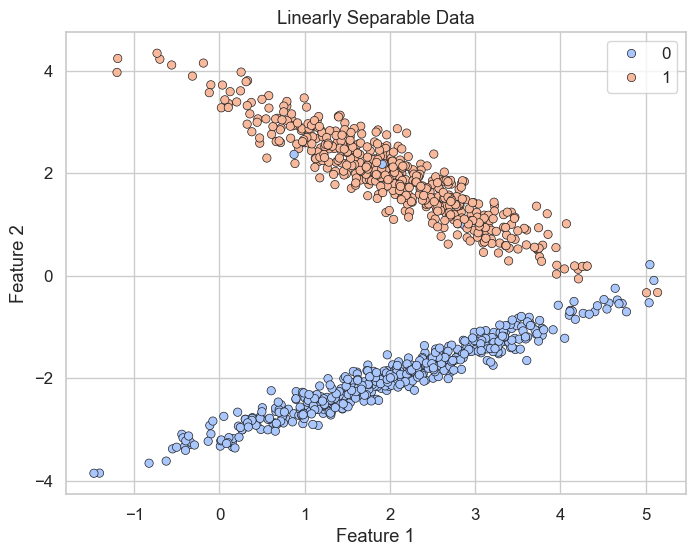

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lin[:, 0], y=X_lin[:, 1], hue=y_lin, palette="coolwarm", edgecolor='k')
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.3, stratify=y_lin, random_state=42
)

In [6]:
scaler_lin = StandardScaler()
X_train_lin = scaler_lin.fit_transform(X_train_lin)
X_test_lin = scaler_lin.transform(X_test_lin)

In [7]:
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (50,), (10, 10), (50, 20)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [8]:
mlp_lin = MLPClassifier(max_iter=1000, random_state=42, verbose=1)
grid_lin = GridSearchCV(mlp_lin, param_grid, cv=5, n_jobs=-1, verbose=1)

In [9]:
grid_lin.fit(X_train_lin, y_train_lin)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=1000, random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(5,), (10,), (50,), (10, 10),
                                                (50, 20)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'lbfgs']},
             verbose=1)

In [10]:
print("Best parameters for Linear Data:")
print(grid_lin.best_params_)
best_lin_model = grid_lin.best_estimator_

Best parameters for Linear Data:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [11]:
y_pred_lin = best_lin_model.predict(X_test_lin)
accuracy_lin = accuracy_score(y_test_lin, y_pred_lin)
print(f"Test Accuracy (Linear Data): {accuracy_lin:.4f}\n")

Test Accuracy (Linear Data): 0.9867



In [12]:
print("Classification Report:")
print(classification_report(y_test_lin, y_pred_lin))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       150
           1       0.98      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



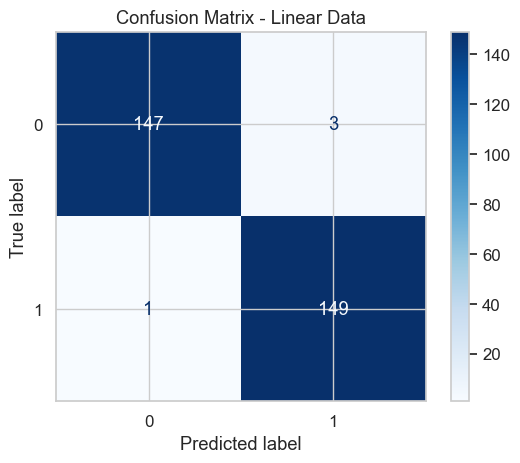

In [13]:
ConfusionMatrixDisplay.from_estimator(best_lin_model, X_test_lin, y_test_lin, cmap='Blues')
plt.title("Confusion Matrix - Linear Data")
plt.show()

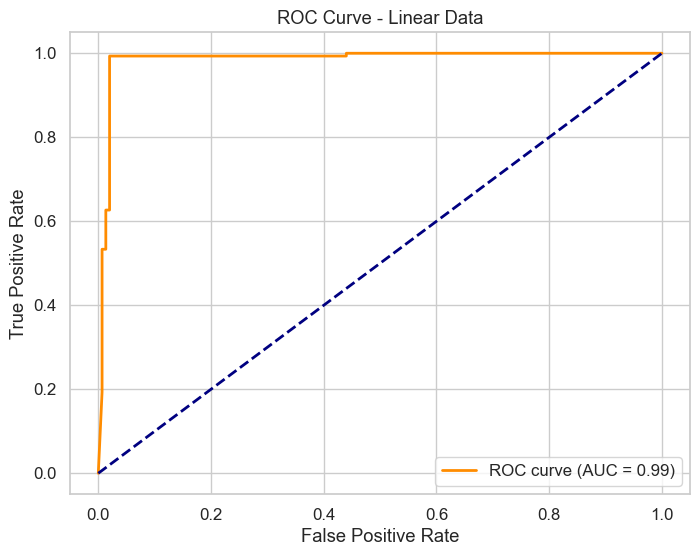

In [14]:
try:
    probas_lin = best_lin_model.predict_proba(X_test_lin)[:, 1]
    fpr_lin, tpr_lin, _ = roc_curve(y_test_lin, probas_lin)
    roc_auc_lin = auc(fpr_lin, tpr_lin)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_lin, tpr_lin, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lin:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Linear Data')
    plt.legend(loc="lower right")
    plt.show()
except Exception as e:
    print("ROC Curve not available:", e)

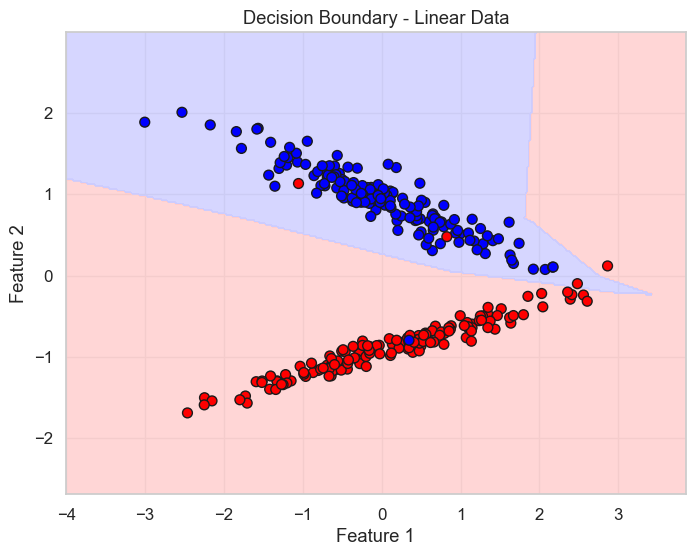

In [15]:
plot_decision_boundary(best_lin_model, X_test_lin, y_test_lin, "Decision Boundary - Linear Data")

## Non-Linear Data (Moons)

In [16]:
X_nl, y_nl = make_moons(n_samples=1000, noise=0.2, random_state=42)

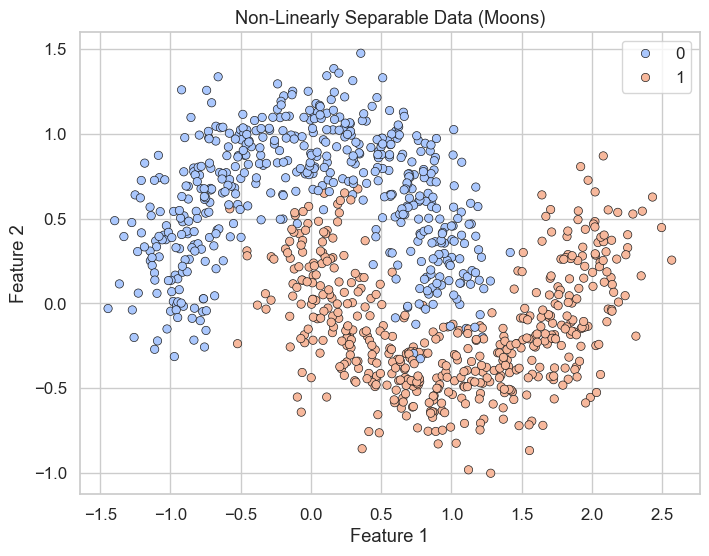

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_nl[:, 0], y=X_nl[:, 1], hue=y_nl, palette="coolwarm", edgecolor='k')
plt.title("Non-Linearly Separable Data (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [18]:
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_nl, y_nl, test_size=0.3, stratify=y_nl, random_state=42
)

In [19]:
scaler_nl = StandardScaler()
X_train_nl = scaler_nl.fit_transform(X_train_nl)
X_test_nl = scaler_nl.transform(X_test_nl)

In [20]:
mlp_nl = MLPClassifier(max_iter=1000, random_state=42)
grid_nl = GridSearchCV(mlp_nl, param_grid, cv=5, n_jobs=-1)

In [21]:
grid_nl.fit(X_train_nl, y_train_nl)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(5,), (10,), (50,), (10, 10),
                                                (50, 20)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'lbfgs']})

In [22]:
print("Best parameters for Non-Linear Data:")
print(grid_nl.best_params_)
best_nl_model = grid_nl.best_estimator_

Best parameters for Non-Linear Data:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 20), 'learning_rate': 'constant', 'solver': 'adam'}


In [23]:
y_pred_nl = best_nl_model.predict(X_test_nl)
accuracy_nl = accuracy_score(y_test_nl, y_pred_nl)
print(f"Test Accuracy (Non-Linear Data): {accuracy_nl:.4f}\n")

Test Accuracy (Non-Linear Data): 0.9833



In [24]:
print("Classification Report:")
print(classification_report(y_test_nl, y_pred_nl))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       150
           1       0.99      0.98      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



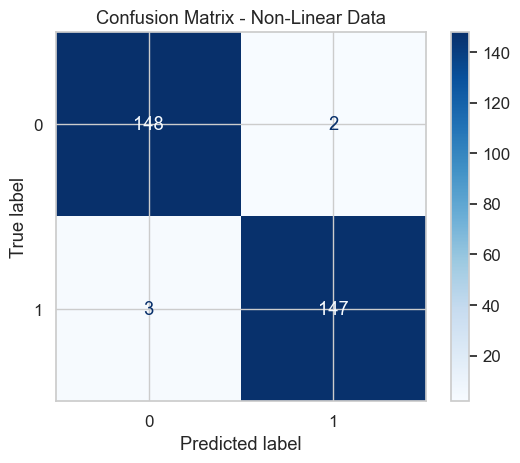

In [25]:
ConfusionMatrixDisplay.from_estimator(best_nl_model, X_test_nl, y_test_nl, cmap='Blues')
plt.title("Confusion Matrix - Non-Linear Data")
plt.show()

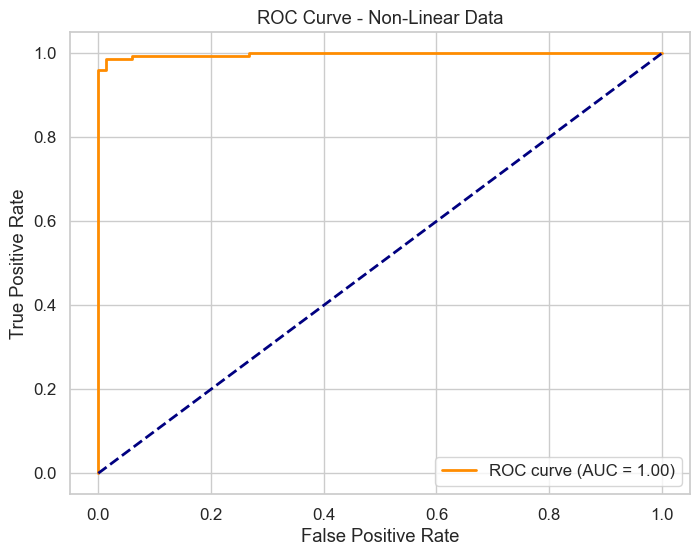

In [26]:
try:
    probas_nl = best_nl_model.predict_proba(X_test_nl)[:, 1]
    fpr_nl, tpr_nl, _ = roc_curve(y_test_nl, probas_nl)
    roc_auc_nl = auc(fpr_nl, tpr_nl)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_nl, tpr_nl, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nl:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Non-Linear Data')
    plt.legend(loc="lower right")
    plt.show()
except Exception as e:
    print("ROC Curve not available:", e)

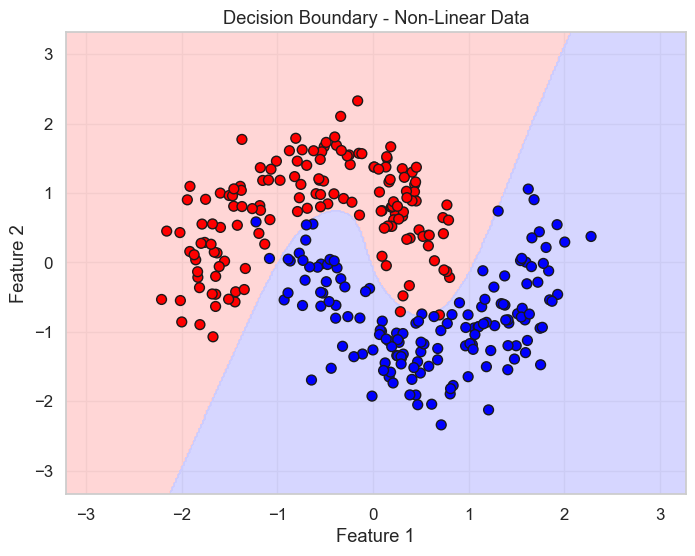

In [27]:
plot_decision_boundary(best_nl_model, X_test_nl, y_test_nl, "Decision Boundary - Non-Linear Data")

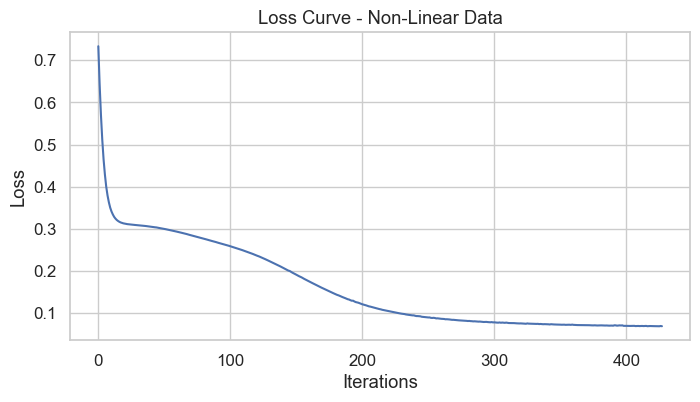

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(best_nl_model.loss_curve_)
plt.title("Loss Curve - Non-Linear Data")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()